# Importing Library

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature Engineering

# Loading Data

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Exploitary Data Analysis

Since there are many columns, we split them into Catogorical Data, Numerical Data and Temporal Variable

In [5]:
features_with_na=[features for features in data.columns]   

In [6]:
features_with_na

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

# Numerical Data

In [7]:
numerical_data=[features for features in data.columns if data[features].dtype !='O']
data[numerical_data]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [8]:
numerical_data

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Temporal data

In [9]:
year_data=[features for features in numerical_data if 'Yr' in features or 'Year' in features]
year_data

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Further Numerical Data can be categorized by 
1.Continuous Data
2.Discrete Data

# Discrete Data

In [10]:
discrete_data=[feature for feature in numerical_data if len(data[feature].unique())<25 and feature not in year_data+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_data)))

Discrete Variables Count: 17


In [11]:
discrete_data

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

# Continuous Data

In [12]:
Continuous_data=[feature for feature in numerical_data if feature not in year_data+['Id']+ discrete_data]
print("Continuous Variables Count: {}".format(len(Continuous_data)))

Continuous Variables Count: 16


In [13]:
Continuous_data

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

# Skewness of Data

We will use Histogram for finding the Distribution or Skewness

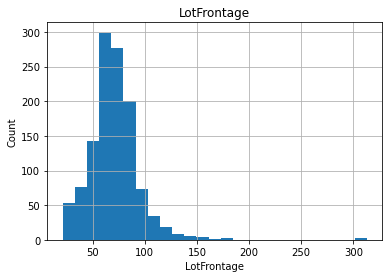

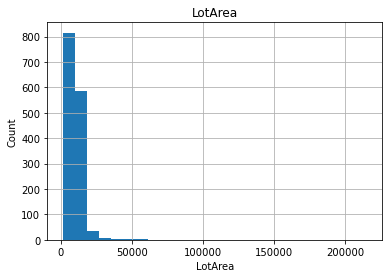

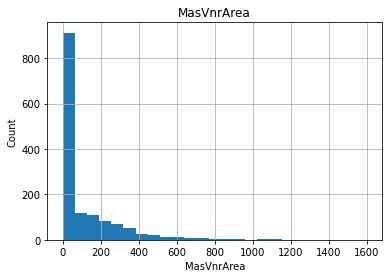

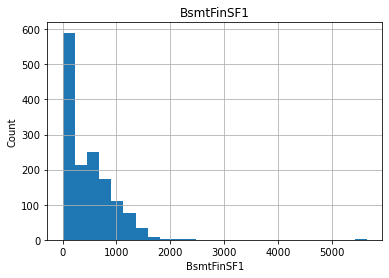

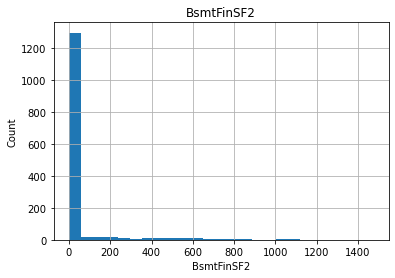

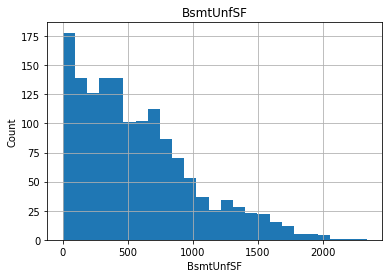

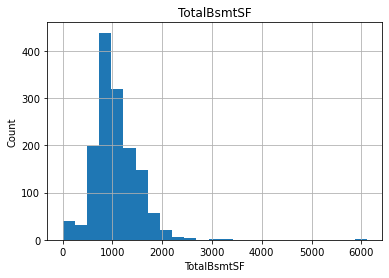

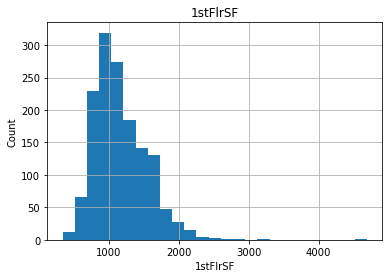

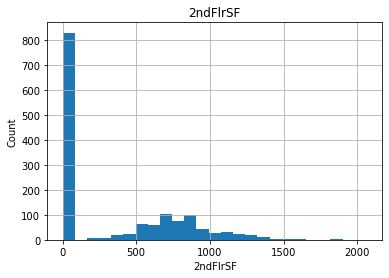

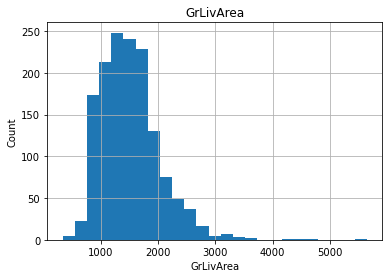

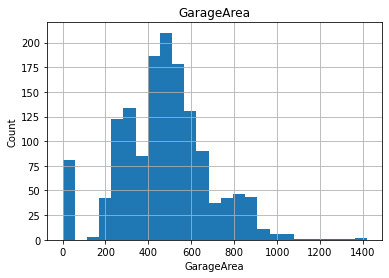

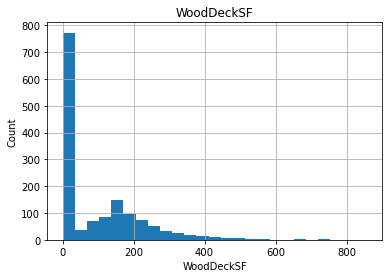

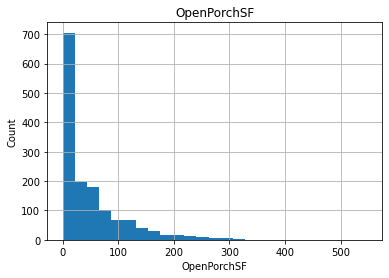

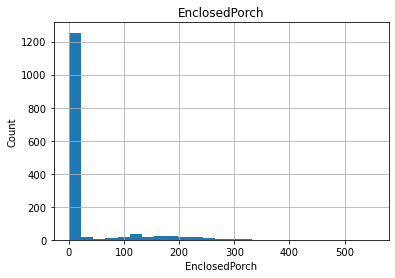

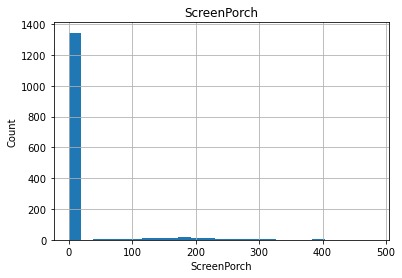

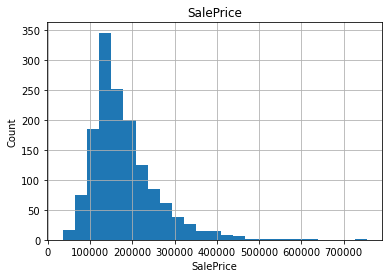

In [14]:
for feature in Continuous_data:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

We will perform Logorthmic Transformation to reduce the Skewness of data

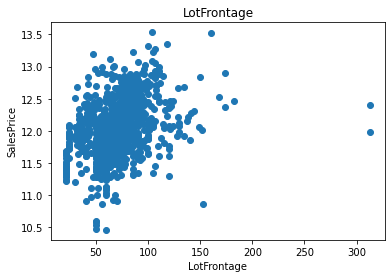

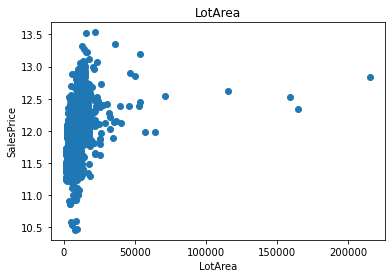

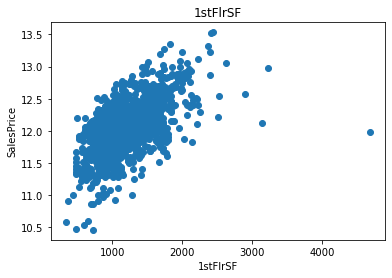

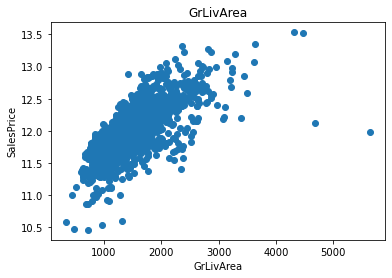

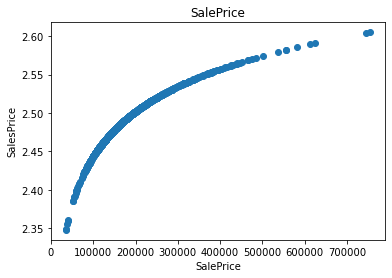

In [15]:
for feature in Continuous_data:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset['SalePrice']=np.log(dataset['SalePrice'])
        plt.scatter(data[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

# Outliers

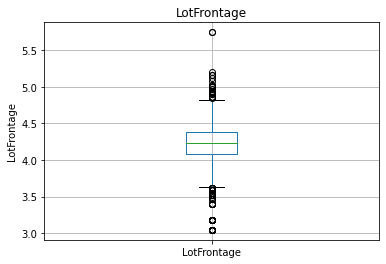

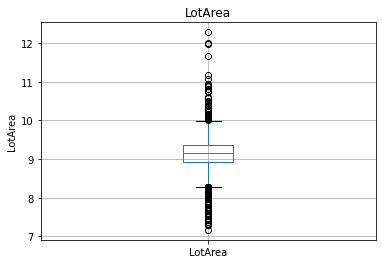

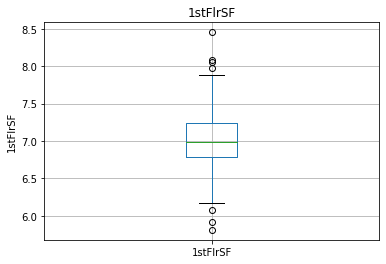

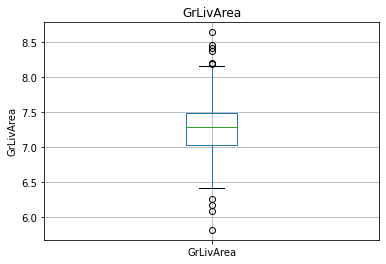

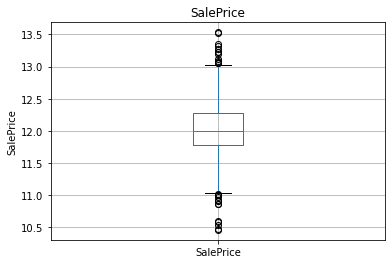

In [16]:
for feature in Continuous_data:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Catogorical data

In [17]:
catogorical_data=[features for features in data.columns if data[features].dtype =='O']
data[catogorical_data]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Filling Missing Values

In [18]:
data=data.fillna(data.mean())


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
def replace_cat_feature(data,catogorical_data):
    data[catogorical_data]=data[catogorical_data].fillna('Missing')
    return data

data=replace_cat_feature(data,catogorical_data)

In [21]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,4,2010,WD,Normal,142125


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    data[feature]=data['YrSold']-data[feature]

# Label Encoding

In [24]:
columns=('Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition')

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in columns: 
    le.fit(list(data[col].values)) 
    data[col] = le.transform(list(data[col].values))
    
    

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int32
 3   LotFrontage    1460 non-null   int64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   int32
 6   Alley          1460 non-null   int32
 7   LotShape       1460 non-null   int32
 8   LandContour    1460 non-null   int32
 9   Utilities      1460 non-null   int32
 10  LotConfig      1460 non-null   int32
 11  LandSlope      1460 non-null   int32
 12  Neighborhood   1460 non-null   int32
 13  Condition1     1460 non-null   int32
 14  Condition2     1460 non-null   int32
 15  BldgType       1460 non-null   int32
 16  HouseStyle     1460 non-null   int32
 17  OverallQual    1460 non-null   int64
 18  OverallCond    1460 non-null   int64
 19  YearBu

# Data Scaling

In [27]:
x1=data.drop(['SalePrice','Id'],axis=1)
y=data['SalePrice']

In [28]:
scalar=MinMaxScaler()
x=scalar.fit_transform(x1)
x= pd.DataFrame(x,columns=x1.columns,index=x1.index)

In [29]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.357143,0.75,0.327273,0.305037,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.472727,0.464552,1.0,0.5,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,0.50,0.25,0.00,0.363636,0.25,1.0,0.8
2,0.357143,0.75,0.354545,0.654851,1.0,0.5,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.727273,0.50,1.0,0.8
3,0.428571,0.75,0.281818,0.456157,1.0,0.5,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.090909,0.00,1.0,0.0
4,0.357143,0.75,0.509091,0.862873,1.0,0.5,0.0,1.0,0.0,0.5,...,0.0,0.0,1.0,0.50,0.25,0.00,1.000000,0.50,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.357143,0.75,0.300000,0.249067,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.636364,0.25,1.0,0.8
1456,0.000000,0.75,0.518182,0.807836,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.75,0.25,0.00,0.090909,1.00,1.0,0.8
1457,0.428571,0.75,0.336364,0.387127,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.00,0.75,0.85,0.363636,1.00,1.0,0.8
1458,0.000000,0.75,0.354545,0.471082,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.272727,1.00,1.0,0.8


# Splitting Data

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10)

In [31]:
xtrain

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1207,0.000000,0.75,0.372727,0.398321,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.363636,0.00,1.00,0.8
801,0.071429,1.00,0.100000,0.084888,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.545455,0.25,1.00,0.8
1417,0.357143,0.75,0.381818,0.918843,1.0,0.5,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.363636,0.75,1.00,0.8
2,0.357143,0.75,0.354545,0.654851,1.0,0.5,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.727273,0.50,1.00,0.8
493,0.000000,0.75,0.372727,0.252799,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.454545,0.50,1.00,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.214286,0.75,0.236364,0.107276,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.75,0.25,0.00,0.272727,0.25,1.00,0.8
439,0.285714,0.75,0.345455,0.755597,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.75,0.55,0.636364,0.75,0.50,0.8
443,0.785714,0.75,0.218182,0.054104,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.454545,0.25,0.75,1.0
525,0.000000,0.25,0.300000,0.211754,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.50,0.25,0.00,0.272727,0.00,1.00,0.8


# Feature Selection

# Pearson Correletion

In [32]:
cor = data.corr()
cor_target = abs(cor["SalePrice"])
cor_features = cor_target[cor_target>0.5]
cor_features

OverallQual     0.790982
YearBuilt       0.527191
YearRemodAdd    0.509079
ExterQual       0.636884
BsmtQual        0.593734
TotalBsmtSF     0.620870
1stFlrSF        0.590882
GrLivArea       0.689795
FullBath        0.560664
KitchenQual     0.589189
TotRmsAbvGrd    0.534591
GarageCars      0.640409
GarageArea      0.639584
SalePrice       1.000000
Name: SalePrice, dtype: float64

# Chi-Squared

In [33]:
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(xtrain,ytrain)
chi_support = chi_selector.get_support()
chi_feature = xtrain.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [34]:
chi_support

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False])

In [35]:
chi_selected_feature = xtrain.columns[(chi_support)]
chi_selected_feature

Index(['LandSlope', 'BldgType', 'MasVnrArea', 'HeatingQC', '2ndFlrSF',
       'LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

# SelectFromModel Method

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=10)
embeded_lr_selector.fit(xtrain, ytrain)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = xtrain.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

10 selected features


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
lr_selected_feature = xtrain.columns[(embeded_lr_support)]
lr_selected_feature

Index(['LotShape', 'LotConfig', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'HeatingQC', 'GarageType', 'GarageFinish', 'YrSold'],
      dtype='object')

# Tree Based Method

In [38]:
!pip install lightgbm

In [39]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=400, learning_rate=0.01, num_leaves=79, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.02, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(xtrain, ytrain)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = xtrain.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

10 selected features


In [40]:
lgb_selected_feature = xtrain.columns[(embeded_lgb_support)]
lgb_selected_feature

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig'],
      dtype='object')

# Recursive Elimination Method

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(x, y)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 79 features.


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 69 features.


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 59 features.


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 49 features.


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 39 features.


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 29 features.


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 19 features.


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 selected features


In [42]:
rfe_feature

['LotShape',
 'LotConfig',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'HeatingQC',
 'GarageType',
 'GarageFinish',
 'YrSold']

In [43]:
xtrain=xtrain[['LotShape','LotConfig','YearRemodAdd','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','GarageType','GarageFinish','YrSold','LandSlope', 'BldgType', 'LowQualFinSF','BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','OverallQual','YearBuilt','ExterQual','TotalBsmtSF','1stFlrSF','GrLivArea','KitchenQual','GarageArea','GarageCars','TotRmsAbvGrd','FullBath']]

In [44]:
xtest=xtest[['LotShape','LotConfig','YearRemodAdd','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','GarageType','GarageFinish','YrSold','LandSlope', 'BldgType', 'LowQualFinSF','BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','OverallQual','YearBuilt','ExterQual','TotalBsmtSF','1stFlrSF','GrLivArea','KitchenQual','GarageArea','GarageCars','TotRmsAbvGrd','FullBath']]

In [45]:
xtrain

,LotShape,LotConfig,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GarageType,GarageFinish,YrSold,...,YearBuilt,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageArea,GarageCars,TotRmsAbvGrd,FullBath
1207,1.0,1.0,0.065574,0.5,0.00,0.333333,0.0,0.166667,0.666667,0.00,...,0.024793,0.666667,0.875000,0.861702,0.609302,0.666667,0.495455,0.50,0.454545,0.666667
801,1.0,1.0,0.295082,1.0,1.00,0.500000,0.0,0.833333,1.000000,0.25,...,0.752066,1.000000,0.552778,0.509309,0.253488,1.000000,0.302273,0.50,0.272727,0.333333
1417,0.0,1.0,0.196721,0.5,0.75,0.333333,0.0,0.166667,0.000000,0.75,...,0.090909,0.666667,0.631944,0.607713,0.915116,0.666667,0.984091,0.75,0.454545,0.666667
2,0.0,1.0,0.114754,0.5,0.75,0.333333,0.0,0.166667,0.666667,0.50,...,0.057851,0.666667,0.297222,0.236702,0.662791,0.666667,0.590909,0.50,0.363636,0.666667
493,1.0,1.0,0.803279,1.0,1.00,0.166667,1.0,0.833333,1.000000,0.50,...,0.396694,1.000000,0.619444,0.574468,0.306977,1.000000,0.127273,0.25,0.363636,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.0,1.0,0.852459,1.0,1.00,1.000000,0.0,1.000000,0.333333,0.25,...,0.421488,1.000000,0.270833,0.199468,0.065116,1.000000,0.000000,0.00,0.181818,0.333333
439,1.0,0.0,0.163934,1.0,0.75,1.000000,0.5,0.833333,1.000000,0.75,...,0.735537,1.000000,0.104167,0.050532,0.253488,0.666667,0.465909,0.50,0.454545,0.333333
443,1.0,1.0,0.016393,0.0,0.00,1.000000,0.0,0.166667,0.000000,0.25,...,0.008264,0.666667,0.608333,0.563830,0.298837,0.666667,0.654545,0.75,0.363636,0.666667
525,1.0,1.0,0.032787,0.5,1.00,1.000000,0.0,0.166667,1.000000,0.00,...,0.008264,0.666667,0.606944,0.571809,0.304651,0.666667,0.322727,0.50,0.363636,0.666667


# ML Models

In [46]:
linear=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

# Training

In [47]:
linear.fit(xtrain,ytrain)
dt.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [48]:
xtrain.shape

(1314, 29)

In [49]:
xtest.shape

(146, 29)

# Predicting

In [50]:
ypred_linear=linear.predict(xtest)
ypred_dt=dt.predict(xtest)
ypred_rf=rf.predict(xtest)

# Finding The Efficient Algorithm

In [51]:
accuracy_linear=mean_squared_error(ytest,ypred_linear)
accuracy_dt=mean_squared_error(ytest,ypred_dt)
accuracy_rf=mean_squared_error(ytest,ypred_rf)



In [52]:
print ("Linear:", accuracy_linear)
print ("Decision Tree:",accuracy_dt)
print ("Random Forest:",accuracy_rf)

Linear: 967202065.8128343
Decision Tree: 1783822096.0753424
Random Forest: 730174197.154121


Since the accuracy of Random Forest Regression is high, further we use it for the deployment